In [1]:
import pandas as pd
import utilsPy3 as u

In [12]:
#load in pickled dataframes

df2009 = pd.read_pickle('../data/df2009_newbase.pkl')
df2010 = pd.read_pickle('../data/df2010_newbase.pkl')
df2011 = pd.read_pickle('../data/df2011_newbase.pkl')
df2012 = pd.read_pickle('../data/df2012_newbase.pkl')
df2013 = pd.read_pickle('../data/df2013_newbase.pkl')

In [13]:
#create df of prediction years
df2009to2012 = pd.concat([df2009, df2010, df2011, df2012])
#create df of all years incl target
df2009to2013 = pd.concat([df2009, df2010, df2011, df2012, df2013])

In [32]:
#create w2v model
model2009to2012 = u.load_or_make_w2v_model('../models/2009to2012.pkl', df2009to2012)

creating new Word2Vec model
saving new Word2Vec model at ../models/2009to2012.pkl


In [33]:
# briefly explore similar words 
basic_garments = ["dress", "skirt", "shirt", "pants", "shoes", "bag"]
for g in basic_garments:
    print("\n\nbase_word: ", g, model2009to2012.wv.vocab[g].count)
    most_sim = [sim[0] for sim in model2009to2012.most_similar(g, topn=20)]
    for g2 in most_sim:
        count = model2009to2012.wv.vocab[g2]
        print(g2, count.count)



base_word:  dress 92916
skirt 39061
romper 2038
jumpsuit 1312
playsuit 402
blouse 10032
tunic 1521
minidress 171
tunicdress 38
sundress 303
shirtdress 242
dres 39
dressand 41
dressi 97
nightie 61
dresstunic 33
strapless 918
topdress 67
blazer 11749
pinafore 55
skirti 47


base_word:  skirt 39061
dress 92916
blouse 10032
romper 2038
tunic 1521
bustier 591
skirtand 18
jumpsuit 1312
pleated 1725
minidress 171
shirtdress 242
tunicdress 38
dressskirt 52
midi 480
miniskirt 153
accordian 14
playsuit 402
maxi 5027
monokini 13
petticoat 233
skirtdress 56


base_word:  shirt 23236
blouse 10032
tshirt 5773
tee 5128
blazer 11749
buttondown 282
sweater 12366
top 36322
vest 6294
shirtdress 242
tunic 1521
cardi 1235
jumper 2188
cardigan 8879
dressshirt 40
hoodie 702
buttonup 359
flannel 480
polo 736
tunicdress 38
pinstriped 69


base_word:  pants 15307
trousers 2278
pant 553
harem 999
jeans 18866
shorts 18698
cargos 64
jeggings 524
bottoms 670
hotpants 78
skinnies 788
hareem 36
palazzo 194
leggings

/Users/clarecodes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [34]:
import feature_eng as features

In [35]:
bg_df = features.make_bigrams(model2009to2012, df2009to2012)

Now creating bigrams


In [36]:
import TrendDFPy3 as trnd

In [37]:
TrendDF = trnd.TrendDF(bg_df)

Creating TrendDF for years 2009 to 2012
Creating counter of all words/bigrams


In [38]:
TrendDF.get_counts_by_year_all_bg(50, 2009, 2012)

Creating TrendDF for years 2009 to 2009
Creating counter of all words/bigrams
Creating TrendDF for years 2010 to 2010
Creating counter of all words/bigrams
Creating TrendDF for years 2011 to 2011
Creating counter of all words/bigrams
Creating TrendDF for years 2012 to 2012
Creating counter of all words/bigrams


{2009: {'playing_dress': 61,
  'gucci_bag': 30,
  'sleeve_dress': 12,
  'bandage_dress': 38,
  'print_heels': 11,
  'zara_bag': 75,
  'skinny_jeans': 580,
  'big_bag': 29,
  'vintage_bag': 168,
  'mini_dress': 337,
  'mini_skirt': 133,
  'zara_skirt': 40,
  'tank_top': 606,
  'body_bag': 12,
  'hm_bag': 95,
  'highwaisted_skirt': 61,
  'tutu_skirt': 61,
  'gladiator_sandals': 157,
  'vintage_dress': 322,
  'fancy_dress': 20,
  'hm_dress': 105,
  'vintage_sweater': 44,
  'velvet_blazer': 24,
  'zara_shoes': 160,
  'dont_dress': 22,
  'sequin_top': 28,
  'bodycon_dress': 30,
  'party_dress': 76,
  'jean_vest': 13,
  'floral_dress': 180,
  'another_dress': 41,
  'strappy_sandals': 30,
  'silver_shoes': 27,
  'hot_pants': 35,
  'chiffon_dress': 31,
  'fur_vest': 86,
  'navy_dress': 21,
  'wash_jeans': 49,
  'waist_skirt': 80,
  'shift_dress': 41,
  'platform_pumps': 20,
  'lace_top': 92,
  'pencil_skirt': 173,
  'plaid_skirt': 38,
  'velvet_dress': 33,
  'sheer_dress': 22,
  'plaid_dress':

In [39]:
TrendDF.find_big_change(2009, 2012, 2, 50)

Creating TrendDF for years 2009 to 2009
Creating counter of all words/bigrams
Creating TrendDF for years 2010 to 2010
Creating counter of all words/bigrams
Creating TrendDF for years 2011 to 2011
Creating counter of all words/bigrams
Creating TrendDF for years 2012 to 2012
Creating counter of all words/bigrams

                    Term: bodycon_dress
                    Count in 2012: 76
                    Count in 2009: 30
                    

                    Term: party_dress
                    Count in 2012: 154
                    Count in 2009: 76
                    

                    Term: chiffon_dress
                    Count in 2012: 88
                    Count in 2009: 31
                    

                    Term: fur_vest
                    Count in 2012: 185
                    Count in 2009: 86
                    

                    Term: shift_dress
                    Count in 2012: 108
                    Count in 2009: 41
                    

   

In [40]:
TrendDF.find_big_change(2010, 2012, 1.5, 50)

Creating TrendDF for years 2010 to 2010
Creating counter of all words/bigrams
Creating TrendDF for years 2011 to 2011
Creating counter of all words/bigrams
Creating TrendDF for years 2012 to 2012
Creating counter of all words/bigrams

                    Term: bodycon_dress
                    Count in 2012: 76
                    Count in 2010: 42
                    

                    Term: party_dress
                    Count in 2012: 154
                    Count in 2010: 69
                    

                    Term: chiffon_dress
                    Count in 2012: 88
                    Count in 2010: 37
                    

                    Term: fur_vest
                    Count in 2012: 185
                    Count in 2010: 106
                    

                    Term: shift_dress
                    Count in 2012: 108
                    Count in 2010: 49
                    

                    Term: pencil_skirt
                    Count in 2012: 390
  

In [96]:
from Trend import Trend

In [97]:
galaxy = Trend('galaxy')

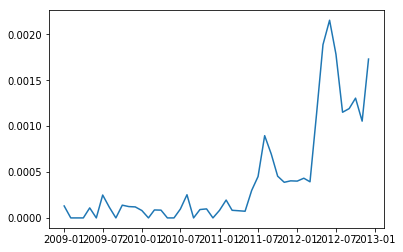

In [98]:
galaxy.plot_by_month(df2009to2012, 1, 2009, 48)

In [99]:
lace = Trend('lace')

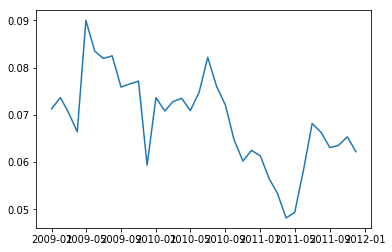

In [100]:
lace.plot_by_month(df2009to2012, 1, 2009, 36)

In [101]:
lace_dress = Trend('lace dress')

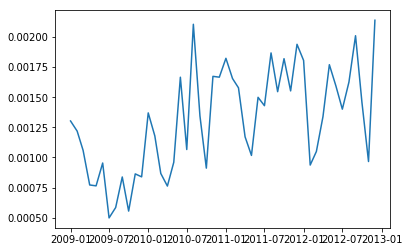

In [117]:
lace_dress.plot_by_month(df2009to2012, 1, 2009, 48)

In [103]:
lace_dress.tfm

array([10,  7,  7,  6,  7,  8,  4,  5,  6,  4,  7,  7, 17, 14, 10,  9, 11,
       19, 11, 25, 15, 10, 17, 16, 22, 17, 19, 15, 14, 20, 19, 25, 20, 24,
       20, 24])

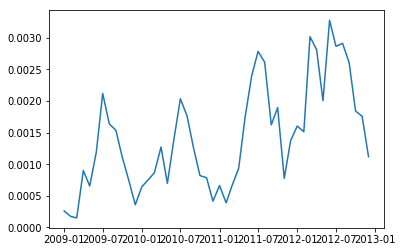

In [118]:
crop_top.plot_by_month(df2009to2012, 1, 2009, 48)

(array([733408., 733528., 733651., 733773., 733893., 734016., 734138.,
        734258., 734381., 734503.]), <a list of 10 Text xticklabel objects>)

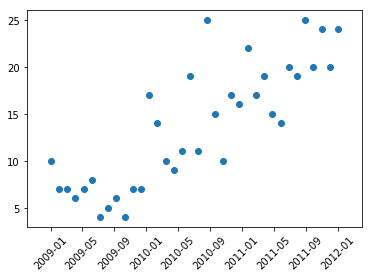

In [104]:
plt.scatter(pd.date_range(pd.datetime(2009, 1, 1), pd.datetime(2012, 1, 1), periods=36), lace_dress.tfm)
plt.xticks(rotation=45)

(array([733408., 733528., 733651., 733773., 733893., 734016., 734138.,
        734258., 734381., 734503.]), <a list of 10 Text xticklabel objects>)

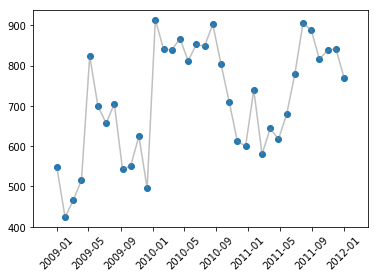

In [105]:
plt.scatter(pd.date_range(pd.datetime(2009, 1, 1), pd.datetime(2012, 1, 1), periods=36), lace.tfm)
plt.plot(pd.date_range(pd.datetime(2009, 1, 1), pd.datetime(2012, 1, 1), periods=36), lace.tfm, c='grey', alpha=.5)
plt.xticks(rotation=45)

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [129]:
def prep_for_seasonal_decompose(trend_object):
    term_frequency = trend_object.tfm/trend_object.tpm
    dates = trend_object.month_year_tuples
    zipped = [(pd.datetime(month[0], month[1], month[2]), count) for month, count in 
                         zip(dates, term_frequency)]
    df = pd.DataFrame(zipped)
    df.columns = ['date', 'term_freq']
    df.index = df.date
    df.drop('date', axis=1, inplace=True)
    return df

def do_seasonal_decompose(trend_word_or_phrase):
    df = prep_for_seasonal_decompose(trend_word_or_phrase)
    decomposition = seasonal_decompose(df.term_freq, freq=12)  
    fig = plt.figure()  
    fig = decomposition.plot()  
    fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

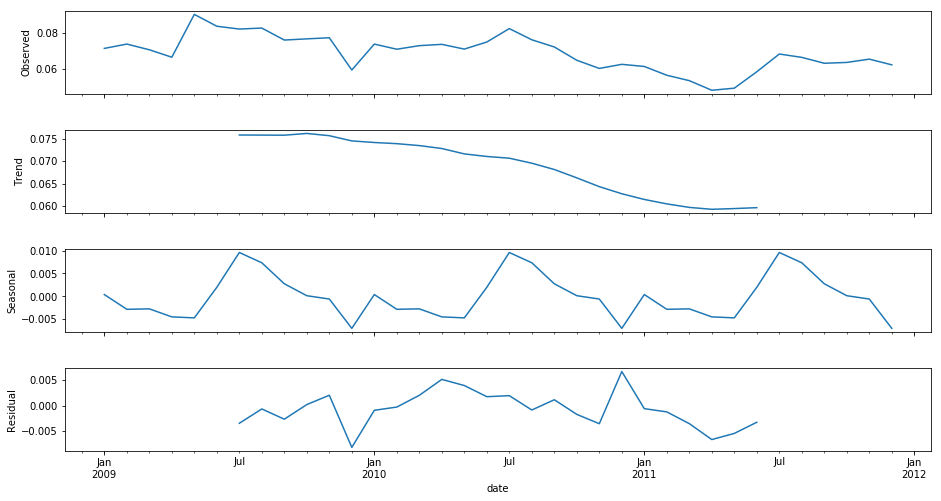

In [130]:
do_seasonal_decompose(lace)

In [131]:
crop_top = Trend('crop top')

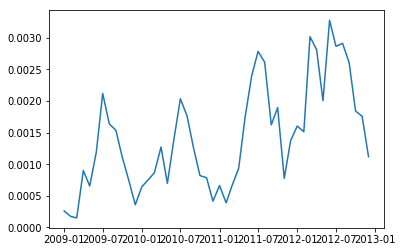

In [132]:
crop_top.plot_by_month(df2009to2012, 1, 2009, 48)

<Figure size 432x288 with 0 Axes>

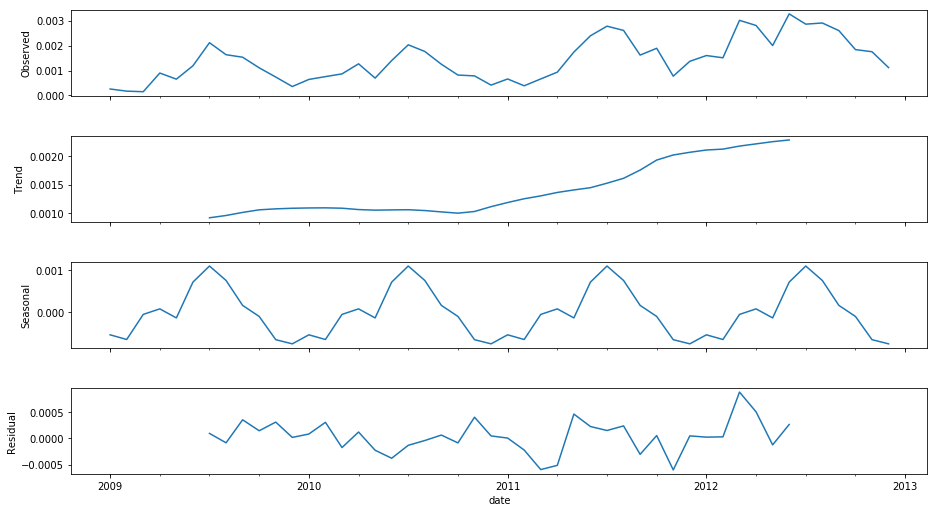

In [133]:
do_seasonal_decompose(crop_top)

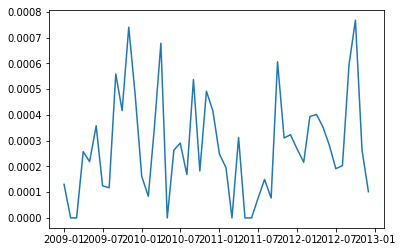

In [134]:
bodycon_dress = Trend('bodycon dress')
bodycon_dress.plot_by_month(df2009to2012, 1, 2009, 48)

<Figure size 432x288 with 0 Axes>

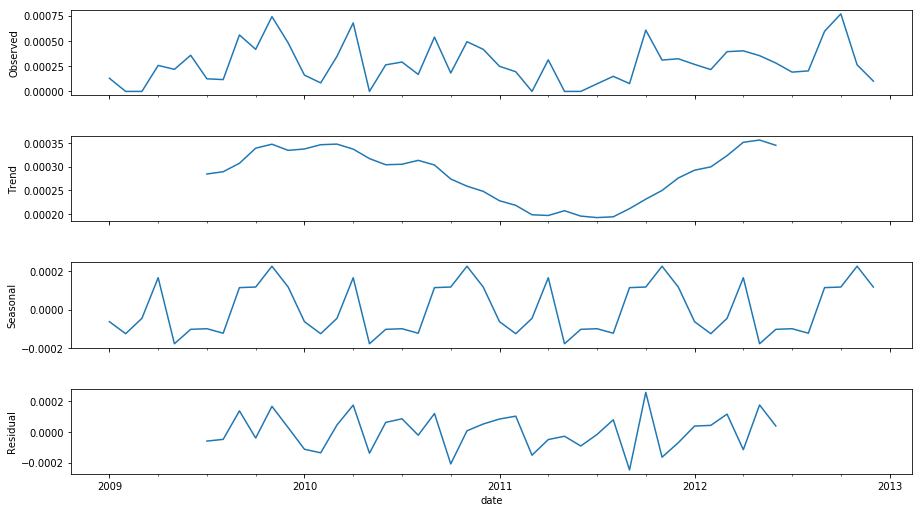

In [135]:
do_seasonal_decompose(bodycon_dress)

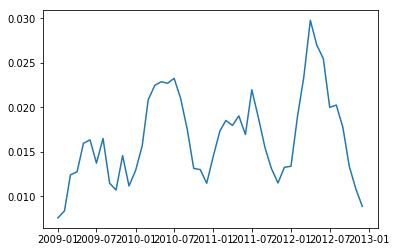

In [136]:
floral = Trend('floral')
floral.plot_by_month(df2009to2012, 1, 2009, 48)

<Figure size 432x288 with 0 Axes>

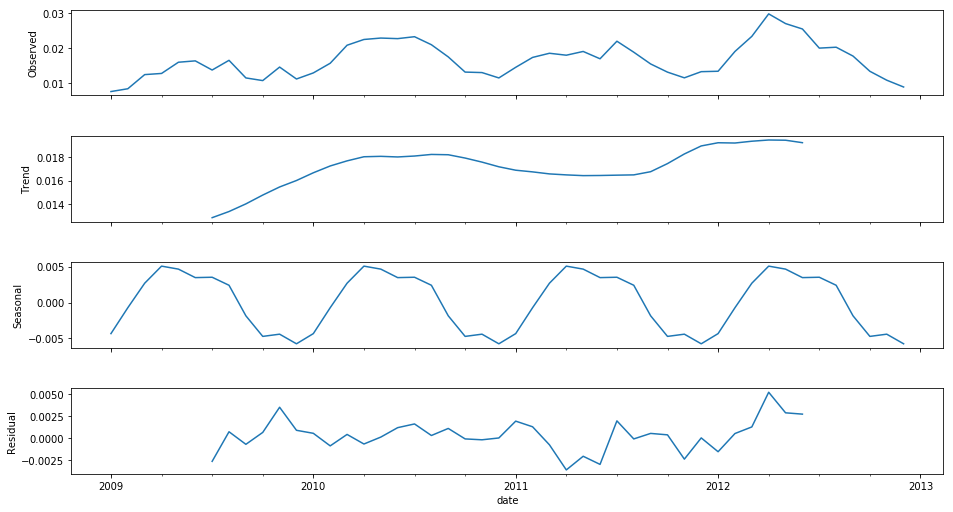

In [137]:
do_seasonal_decompose(floral)

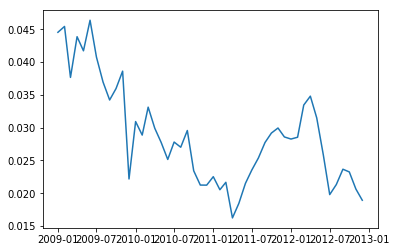

In [138]:
jeans = Trend('jeans')
jeans.plot_by_month(df2009to2012, 1, 2009, 48)

<Figure size 432x288 with 0 Axes>

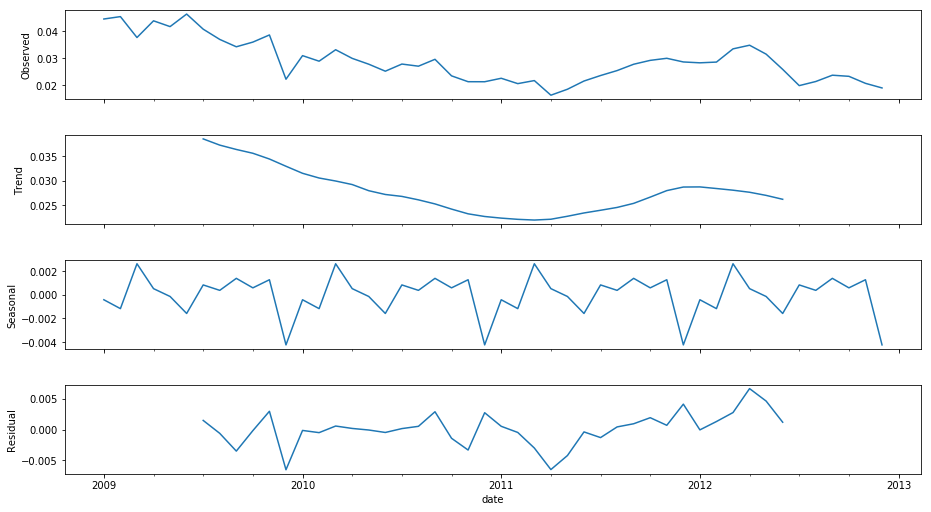

In [139]:
do_seasonal_decompose(jeans)

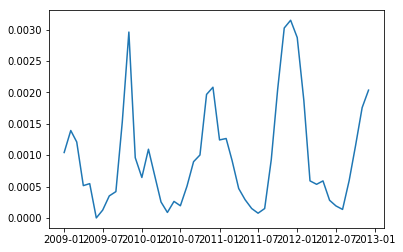

In [140]:
fur_vest = Trend('fur vest')
fur_vest.plot_by_month(df2009to2012, 1, 2009, 48)

<Figure size 432x288 with 0 Axes>

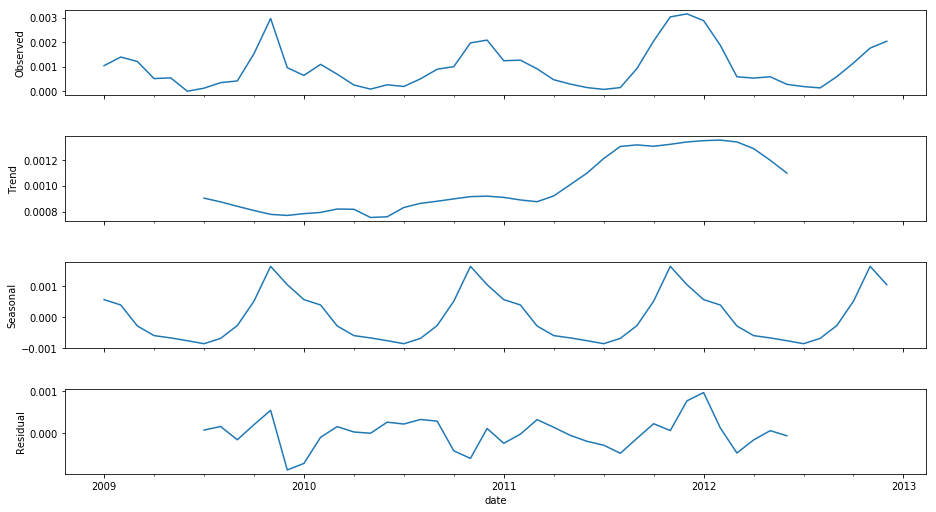

In [141]:
do_seasonal_decompose(fur_vest)

In [110]:
lace_dress_df = prep_for_seasonal_decompose(lace_dress)

In [111]:
lace_dress_df.to_csv('../../sarima/lace_dress.csv')

In [112]:
crop_top = Trend('crop top')

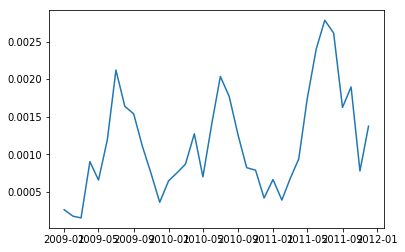

In [113]:
crop_top.plot_by_month(df2009to2011, 1, 2009, 36)

In [114]:
crop_top_df = prep_for_seasonal_decompose(crop_top)

In [64]:
prep_for_seasonal_decompose(crop_top).to_csv('../../sarima/crop_top.csv')

<Figure size 432x288 with 0 Axes>

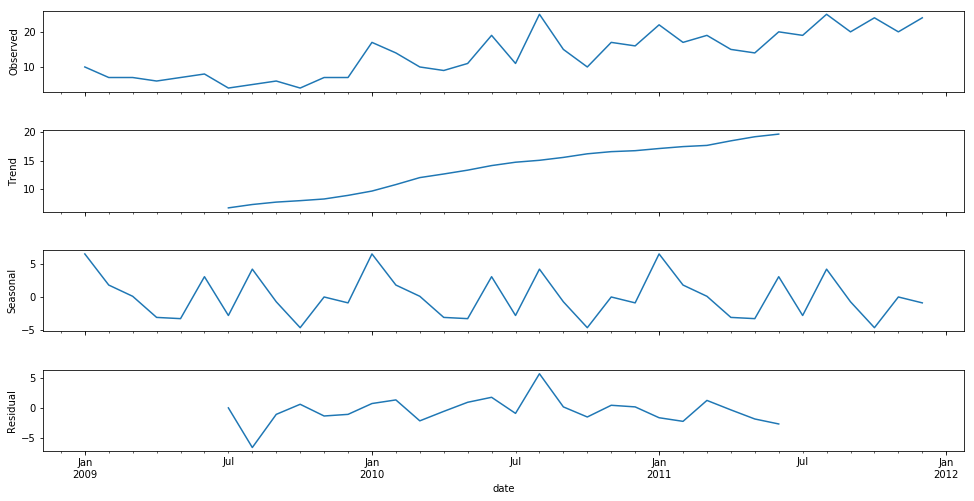

In [68]:
decomposition = seasonal_decompose(lace_dress_df.term_freq, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

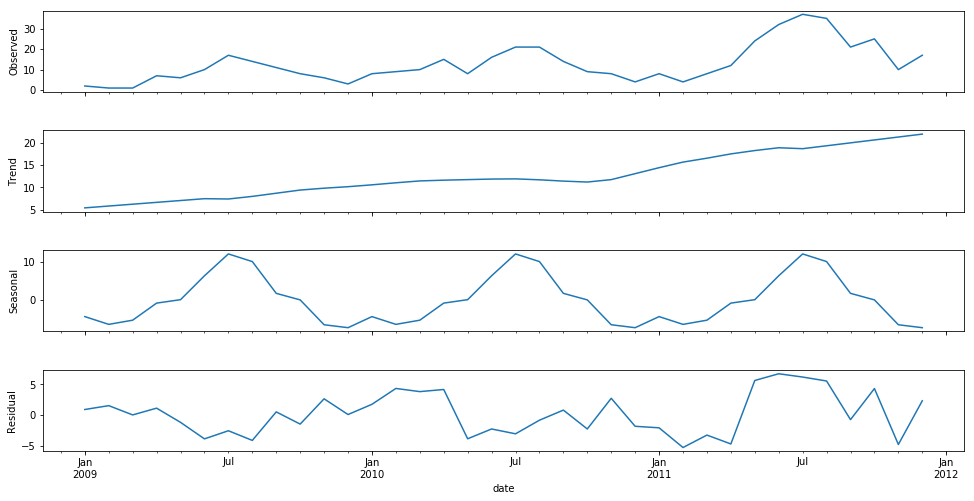

In [72]:
decomposition = seasonal_decompose(crop_top_df.term_freq, freq=12, extrapolate_trend='freq')  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [71]:
decomposition.trend

date
2009-01-01          NaN
2009-02-01          NaN
2009-03-01          NaN
2009-04-01          NaN
2009-05-01          NaN
2009-06-01          NaN
2009-07-01     7.416667
2009-08-01     8.000000
2009-09-01     8.708333
2009-10-01     9.416667
2009-11-01     9.833333
2009-12-01    10.166667
2010-01-01    10.583333
2010-02-01    11.041667
2010-03-01    11.458333
2010-04-01    11.625000
2010-05-01    11.750000
2010-06-01    11.875000
2010-07-01    11.916667
2010-08-01    11.708333
2010-09-01    11.416667
2010-10-01    11.208333
2010-11-01    11.750000
2010-12-01    13.083333
2011-01-01    14.416667
2011-02-01    15.666667
2011-03-01    16.541667
2011-04-01    17.500000
2011-05-01    18.250000
2011-06-01    18.875000
2011-07-01          NaN
2011-08-01          NaN
2011-09-01          NaN
2011-10-01          NaN
2011-11-01          NaN
2011-12-01          NaN
Name: term_freq, dtype: float64

In [73]:
lace_df = prep_for_seasonal_decompose(lace)

<Figure size 432x288 with 0 Axes>

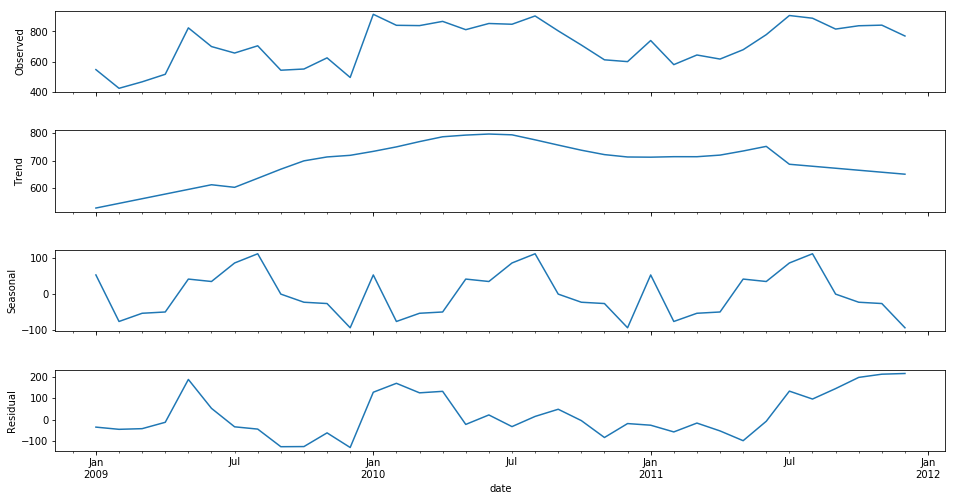

In [74]:
decomposition = seasonal_decompose(lace_df.term_freq, freq=12, extrapolate_trend='freq')  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)